In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Box-Muller method

The Box-Muller method is a famous way to sample gaussian values from a uniform. Even cooler, it simulates *pairs* of standard normal variables from *pairs* of uniforms.

The core of the Box-Muller method is a probabilistic interpretation of the standard trick every mathematician learns when they are young for computing the famous integral

$$ I=\int_{-\infty}^\infty{e^{-x^2}dx} $$

This is incalculable, but when we square it, magically by using polar coordinates we can compute it.

Suppose $X,Y$ is a pair of independent standard normals $N(0,1)$. Then the probability density function of the pair $(X,Y)$ (**Note:** this is **not** the product!) is the product of the pdfs:

$$ p(x,y) = \frac{1}{2\pi}e^{-(x^2+y^2)/2} $$

The trick now is to use polar coordinates

$$ X = R\cos{\theta}\text{  and  } Y=R\sin{\theta} $$

Here we know that $\theta$ is uniformly distributed on $[0,2\pi]$, so could be modeled using $z\sim\text{uniform}(0,1)$ as $\theta=2\pi z$.

To sample $R$, we write down the cdf in terms of $R$:

$$ G(r)=P(R\le r) = \int_0^r\int_0^{2\pi}{\frac{1}{2\pi}e^{-s^2/2}s ds d\theta} = \int_0^r{se^{-s^2/2} ds} $$

But this is completely integrable to get

$$ G(r) = 1-e^{-r^2/2} $$

So we can sample from $G(R)=1-e^{-R^2/2}=1-U$ where $U=\text{uniform}(0,1)$, ie, where

$$ R = \sqrt{-2\ln{U}} $$

In [2]:
def box_muller(num_samples=1000):
    samples = []
    
    for _ in range(num_samples):
        u1 = np.random.uniform(0,1)
        u2 = np.random.uniform(0,1)
        # generate r and theta
        theta = 2 * np.pi * u1
        r = np.sqrt(-2 * np.log(u2))
        # get x, y
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        samples.append((x,y))
    return samples

box_muller(1)

[(0.3507611477371857, -1.5474625220496827)]

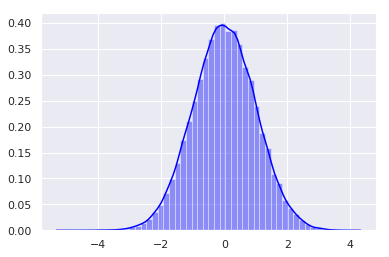

In [7]:
samples = box_muller(50000)
f_samples = np.array([p[0] for p in samples])
g_samples = np.array([p[1] for p in samples])

sns.set()
sns.distplot(f_samples, color='blue')
plt.show()

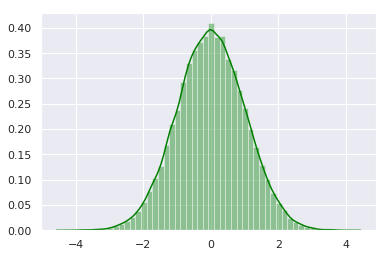

In [6]:
sns.distplot(g_samples, color='green')
plt.show()

This is pretty cool.